In [1]:
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
import matplotlib.pyplot as plt

Using TensorFlow backend.


## PART A - TensorFlow and the Low Level API. [50 Marks]



### Question 1_1
Your initial objective is to build a SoftMax classifier for this problem (in other words your
model will only contain one Softmax layer). More specifically you need to use
TensorFlow 2.1 to build a single SoftMax layer containing 10 neurons for this problem.

In [2]:
'''
Function from the assignment brief with modified return type
'''
def loadData():
    fashion_mnist = tf.keras.datasets.fashion_mnist

    # load the training and test data    
    (tr_x, tr_y), (te_x, te_y) = fashion_mnist.load_data()

    # reshape the feature data
    #print(tr_x.shape)

    tr_x = tr_x.reshape(tr_x.shape[0], 784)
    te_x = te_x.reshape(te_x.shape[0], 784)
    #print(tr_x.shape)

    # noramlise feature data
    tr_x = tr_x / 255.0
    te_x = te_x / 255.0

    print( "Shape of training features ", tr_x.shape)
    print( "Shape of test features ", te_x.shape)


    # one hot encode the training labels and get the transpose
    tr_y = np_utils.to_categorical(tr_y,10)
    tr_y = tr_y.T
    print ("Shape of training labels ", tr_y.shape)

    # one hot encode the test labels and get the transpose
    te_y = np_utils.to_categorical(te_y,10)
    te_y = te_y.T
    print ("Shape of testing labels ", te_y.shape)
    #Returning tensor flow variables
    return  tf.Variable(tr_x, dtype=tf.float32),  \
            tf.Variable(tr_y,  dtype=tf.float32), \
            tf.Variable(te_x,  dtype=tf.float32), \
            tf.Variable(te_y,  dtype=tf.float32)


#### Please make sure your code includes the following three functions:

1. A function called **forward_pass**. This function should use matrix multiplication
along with other low level functions to push the entire feature matrix through
the Softmax layer and should return the 10 class probabilities for all features
instances (as one collective matrix).


In [3]:
@tf.function
def forward_pass(x, w, b):
    t = tf.exp(tf.add(tf.matmul(x, w), b))
    sm =  t / tf.reduce_sum(t, axis= 1, keepdims=True)
    #print(H)
    return sm

2. A function called **cross_entropy**. The objective of this function is to take in the
matrix of probabilities for all feature instances (the output of forward_pass
above) along with the one-hot-encoded true class labels and calculate the total
cross entropy loss.


In [12]:

@tf.function
def cross_entropy(predicted, y):
    ce = -tf.reduce_sum(tf.transpose(y) * tf.math.log(predicted), axis=1)
    loss = tf.reduce_mean(ce)
    return loss

3. A function called **calculate_accuracy**. This function should take in the matrix of
probabilities for all feature instances (the output of forward_pass) along with
the one-hot-encoded true class labels and calculate the current accuracy of the
model.

In [5]:
#Implementation inpired from the link below to the tensor flow guide.
#https://www.tensorflow.org/guide/keras/train_and_evaluate
def calculate_accuracy(predicted, y):
    #Either transpose or run argmax on axis 1
    predicted = tf.argmax(predicted, axis=1)
    y = tf.argmax(y, axis=0)
    values = tf.cast(y, tf.int32) == tf.cast(predicted, tf.int32)
    values = tf.cast(values, tf.float32)
    accuracy = tf.reduce_mean(values)
    return accuracy



In [6]:
#Impementation from the lecture notes.
#I have noticed that this implementation gives me too high accuracy
@tf.function
def calculate_accuracy2(predicted, y):
    predictions = tf.round(tf.transpose(predicted))
    print(predictions)
    print(y)
    correctPredictions = tf.cast(tf.equal(predictions, y), dtype=tf.float32)
    #print(correctPredictions)
    accuracy = tf.reduce_mean(correctPredictions)
    return accuracy

In [7]:
'''
Main execution function
I observe substantial differences in accuracy and loss depending on setting the initial weights
For example, settign stdev to 0.5 produced totally different result in the # of epochs
'''
def run(iterations, optimiser, numberOfClasses, dataSize):
    #Create random weights
    w = tf.Variable(tf.random.normal([dataSize, numberOfClasses], mean=0.0, stddev=0.01, dtype=tf.float32))
    #Initialise bias to all zeros
    b = tf.Variable(tf.zeros([1, numberOfClasses]))
    #Repeat for # of Epochs
    for i in range(iterations):
        with tf.GradientTape() as tape:
            #Run forward pass
            predictions = forward_pass(tr_x, w, b)
            #calculate loss
            loss = cross_entropy(predictions, tr_y)
            #Run forward pass on test data
            testPredictions = forward_pass(te_x, w, b)
            #Capture stats
            history['trainAccuracy'].append(calculate_accuracy(predictions, tr_y).numpy())
            history['trainLoss'].append(loss.numpy())
            history["testAccuracy"].append(calculate_accuracy(testPredictions, te_y).numpy())
            history["testLoss"].append(cross_entropy(testPredictions, te_y).numpy())

        #Invoke gradient descent
        gradients = tape.gradient(loss, [w, b])
        optimiser.apply_gradients(zip(gradients, [w, b]))
        
   

       
    
  
    

In [8]:
#Numer of classe is 10 as per the dataset
numberOfClasses = 10
#Run for 100 iterations
epochs = 100
accuracy = {}
#Initialise stats arrays
history ={}
history["trainAccuracy"] = []
history['trainLoss'] = []
history["testAccuracy"] = []
history['testLoss'] = []
#Load data
tr_x, tr_y, te_x, te_y = loadData()
inputSize = tr_x.shape[1]
#Run model f
run(epochs, tf.keras.optimizers.Adam(), numberOfClasses, tr_x.shape[1])



Shape of training features  (60000, 784)
Shape of test features  (10000, 784)
Shape of training labels  (10, 60000)
Shape of testing labels  (10, 10000)


Summarise and visualise the results:

Train accuracy: 0.78548336
Test accuracy: 0.7715
Train loss: 0.6831733
Test loss: 0.70174855




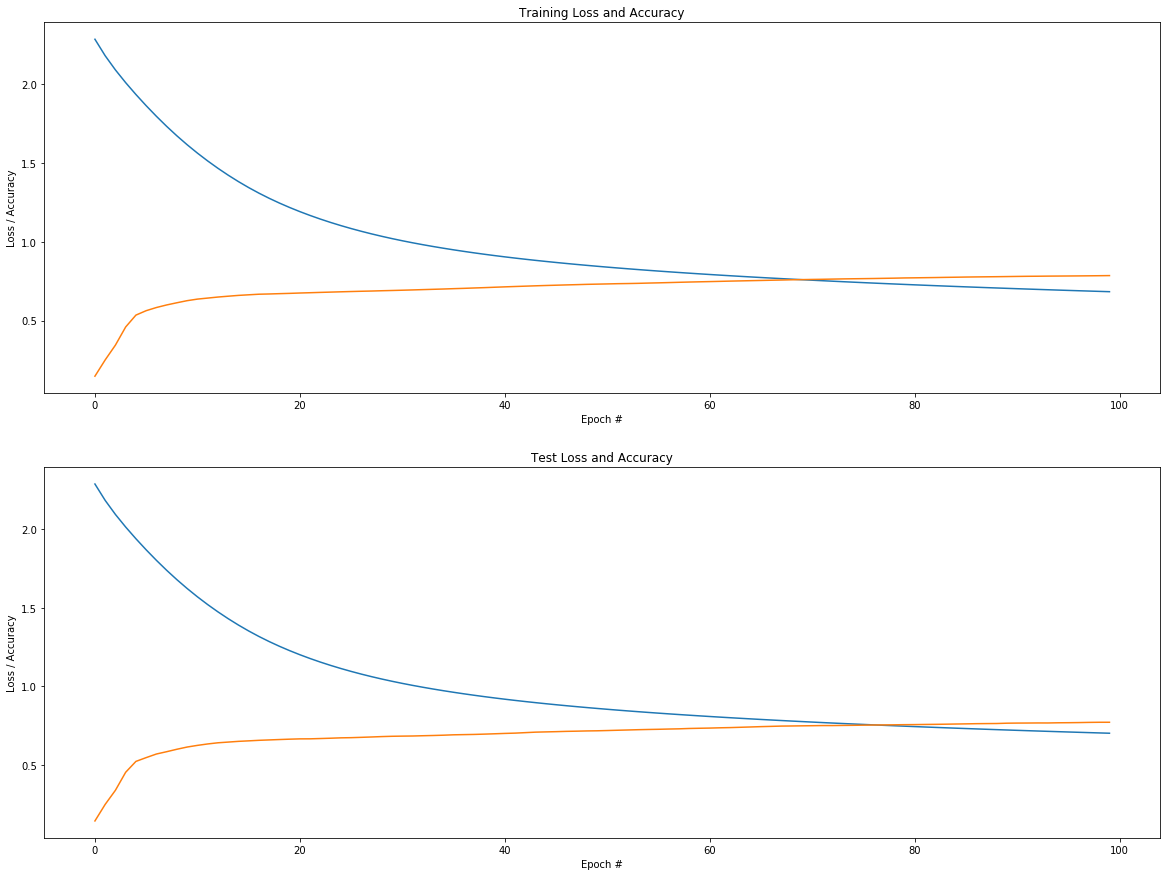

In [9]:


print('Train accuracy:', history['trainAccuracy'][-1])
print('Test accuracy:', history['testAccuracy'][-1])
print('Train loss:', history['trainLoss'][-1])
print('Test loss:', history['testLoss'][-1])
print("\n")


plt.figure(figsize=(20,15))
plt.subplot(2, 1, 1)
plt.plot(history['trainLoss'])
plt.plot(history['trainAccuracy'])
plt.xlabel('Epoch #')
plt.ylabel('Loss / Accuracy')
plt.title("Training Loss and Accuracy")

plt.subplot(2, 1, 2)
plt.plot(history['testLoss'])
plt.plot(history['testAccuracy'])
plt.xlabel('Epoch #')
plt.ylabel('Loss / Accuracy')
plt.title("Test Loss and Accuracy")


plt.show()

#### Validation:
Now, run same in Keras for validation purpose.
The outcomes should be similar.

In [ ]:
#Visualise output from Keras
def visualiseOutput(history, results):
    print("\n")
    print("Test Loss: ", results[0])
    print("Test Accuracy: ", results[1])
    print("\n")
    plt.figure(figsize=(20,10))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
   
    plt.title('Training Loss and Accuracy')
    plt.ylabel('Loss/Accuracy')
    plt.xlabel('Epoch #')
    plt.legend(['train loss', 'val loss', 'train acc', 'val acc'], loc='lower left')
    plt.show()

Shape of training features  (60000, 784)
Shape of test features  (10000, 784)
Shape of training labels  (10, 60000)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________

10000/10000 [==============================] - 1s 56us/sample - loss: 0.7380 - accuracy: 0.7563


Test Loss:  0.7379923054695129
Test Accuracy:  0.7563




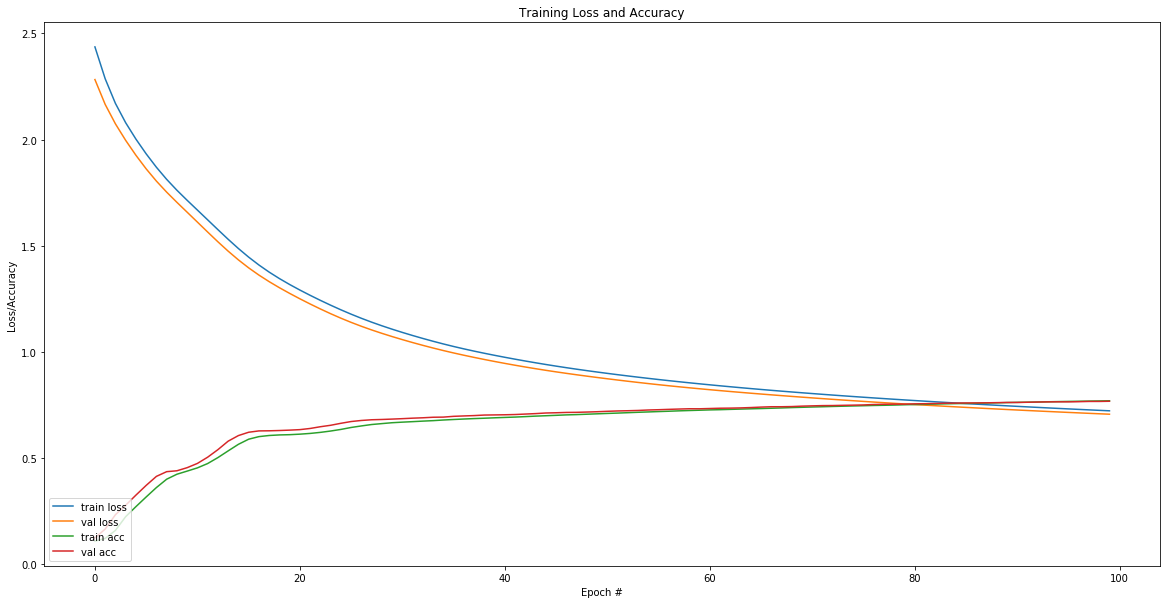

In [11]:
fashion_mnist = tf.keras.datasets.fashion_mnist

# load the training and test data    
(tr_x, tr_y), (te_x, te_y) = fashion_mnist.load_data()

# reshape the feature data
#print(tr_x.shape)

tr_x = tr_x.reshape(tr_x.shape[0], 784)
te_x = te_x.reshape(te_x.shape[0], 784)
    #print(tr_x.shape)

# noramlise feature data
tr_x = tr_x / 255.0
te_x = te_x / 255.0

print( "Shape of training features ", tr_x.shape)
print( "Shape of test features ", te_x.shape)


# one hot encode the training labels and get the transpose
tr_y = np_utils.to_categorical(tr_y,10)
tr_y = tr_y.T
print ("Shape of training labels ", tr_y.shape)

# one hot encode the test labels and get the transpose
te_y = np_utils.to_categorical(te_y,10)
te_y = te_y.T

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax, input_shape=(784,)))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
hist = model.fit(tr_x, tf.transpose(tr_y), epochs=100, batch_size=60000, validation_split=0.1, verbose=0)
print('')
results = model.evaluate(te_x, tf.transpose(te_y))
visualiseOutput(hist, results)